# PREDICTING THE WINE CLASSIFICATION

INITIAL OBSERVATION:

    BY USING THE GIVEN DATA-SET WE WILL CLASSIFY THE UNLABELED WINE ACCORDINGLY ON THE BASIS OF THE GIVEN ATTRIBUTES      RESPECTIVELY.

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
df=pd.read_csv("winedataset.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# COLLECTING STATISTICS DATA FROM THE GIVEN DATA-SET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.shape

(178, 14)

In [6]:
#attributes
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


INITIAL OBSERVATIONS :
    
    1.THERE ARE NO MISSING VALUES IN THE GIVEN DATA SET,SINCE THE MEAN AND THE MEDIAN ARE MOSTLY SIMILAR.
    
    2.THERE IS NO MUCH DIFFERENCE BETWEEN 75% AND THE MAX VALUE.
    
    3.SO THERE IS NO EVIDENT OUTLIERS PRESENT IN THE GIVEN DATA-SET.

# EXPLORATORY DATA ANALYSIS

In [9]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [10]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

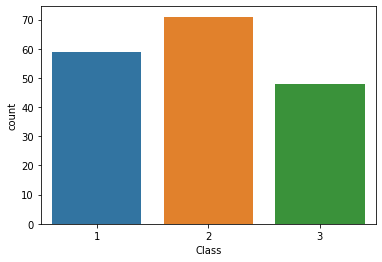

In [11]:
sn.countplot(x="Class",data=df)

1.With the help of the above graph we can say that the class-2 wine has more concentration compared to class-1 and class-3.

In [12]:
#checking for missing values
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

1.There are missing values found in the given Data-set.

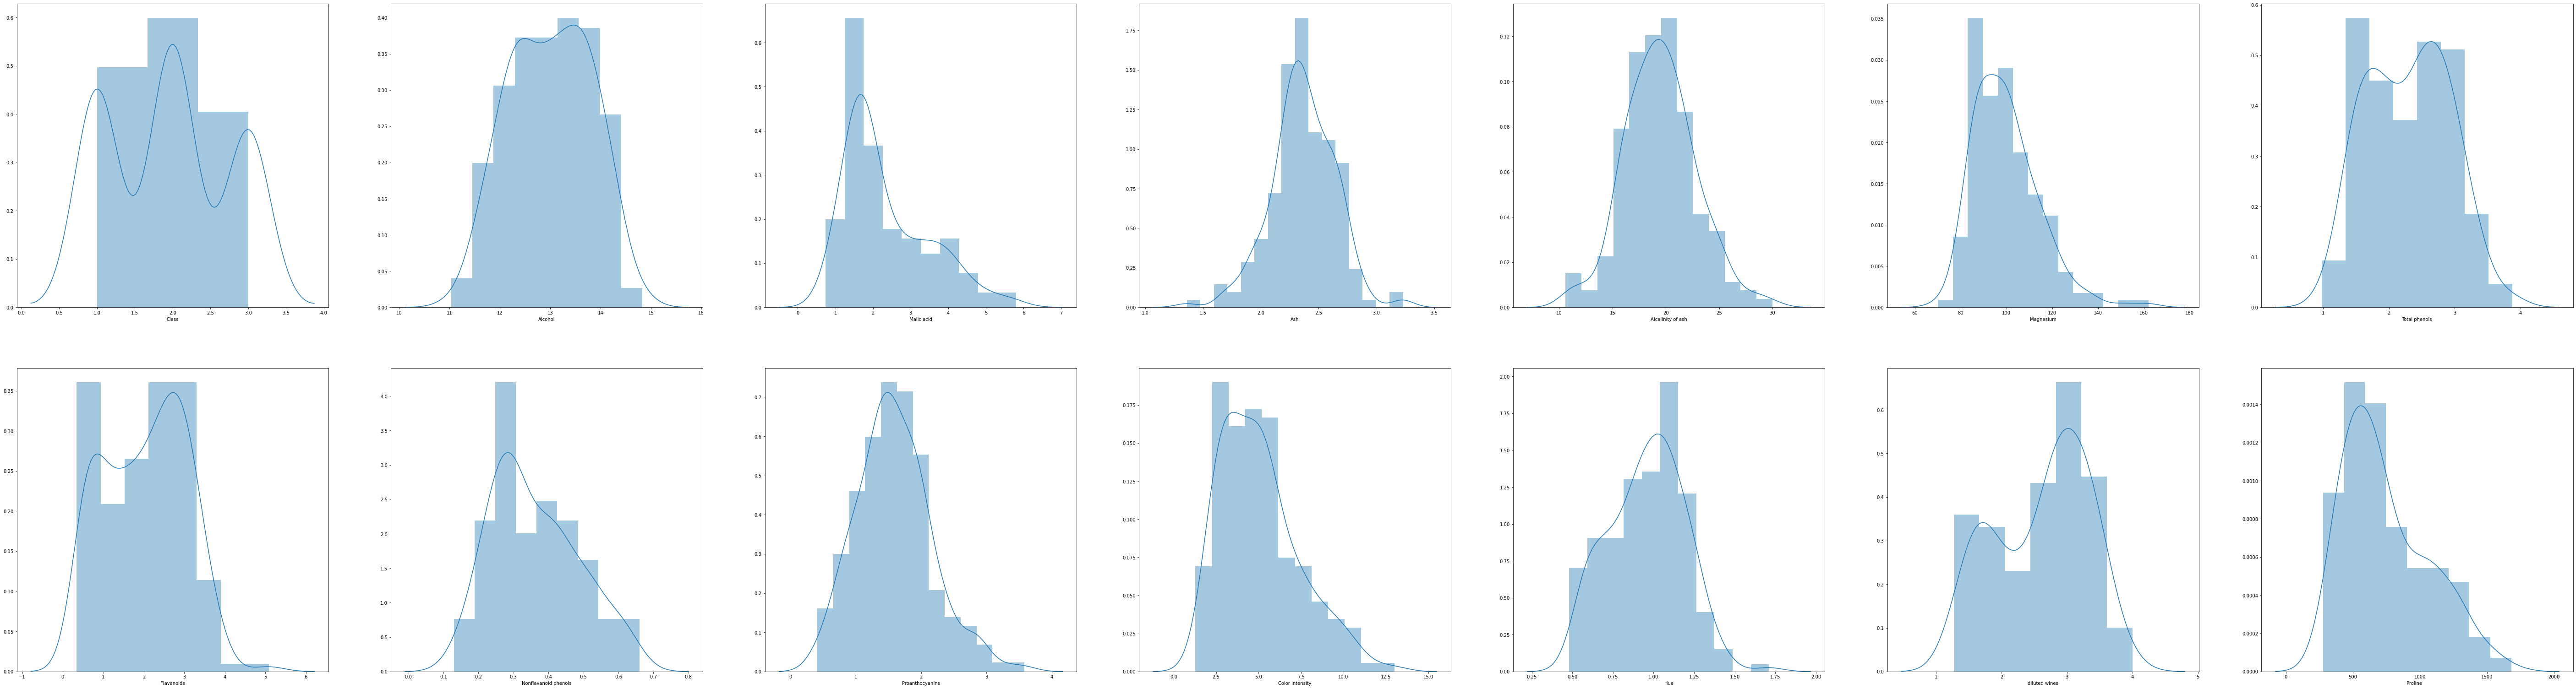

In [22]:
#univariate analysis
cols=df.columns.values
ncol=7
nrow=7
plt.figure(figsize=(100,100))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sn.distplot(df[cols[i]])

1.The above displacement plot shows us more number of column attributs have a normal distribution.

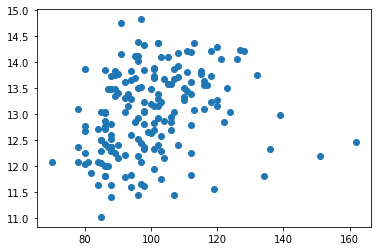

In [23]:
#bivariate analysis
plt.scatter(df["Magnesium"],df["Alcohol"])

<Figure size 720x720 with 0 Axes>

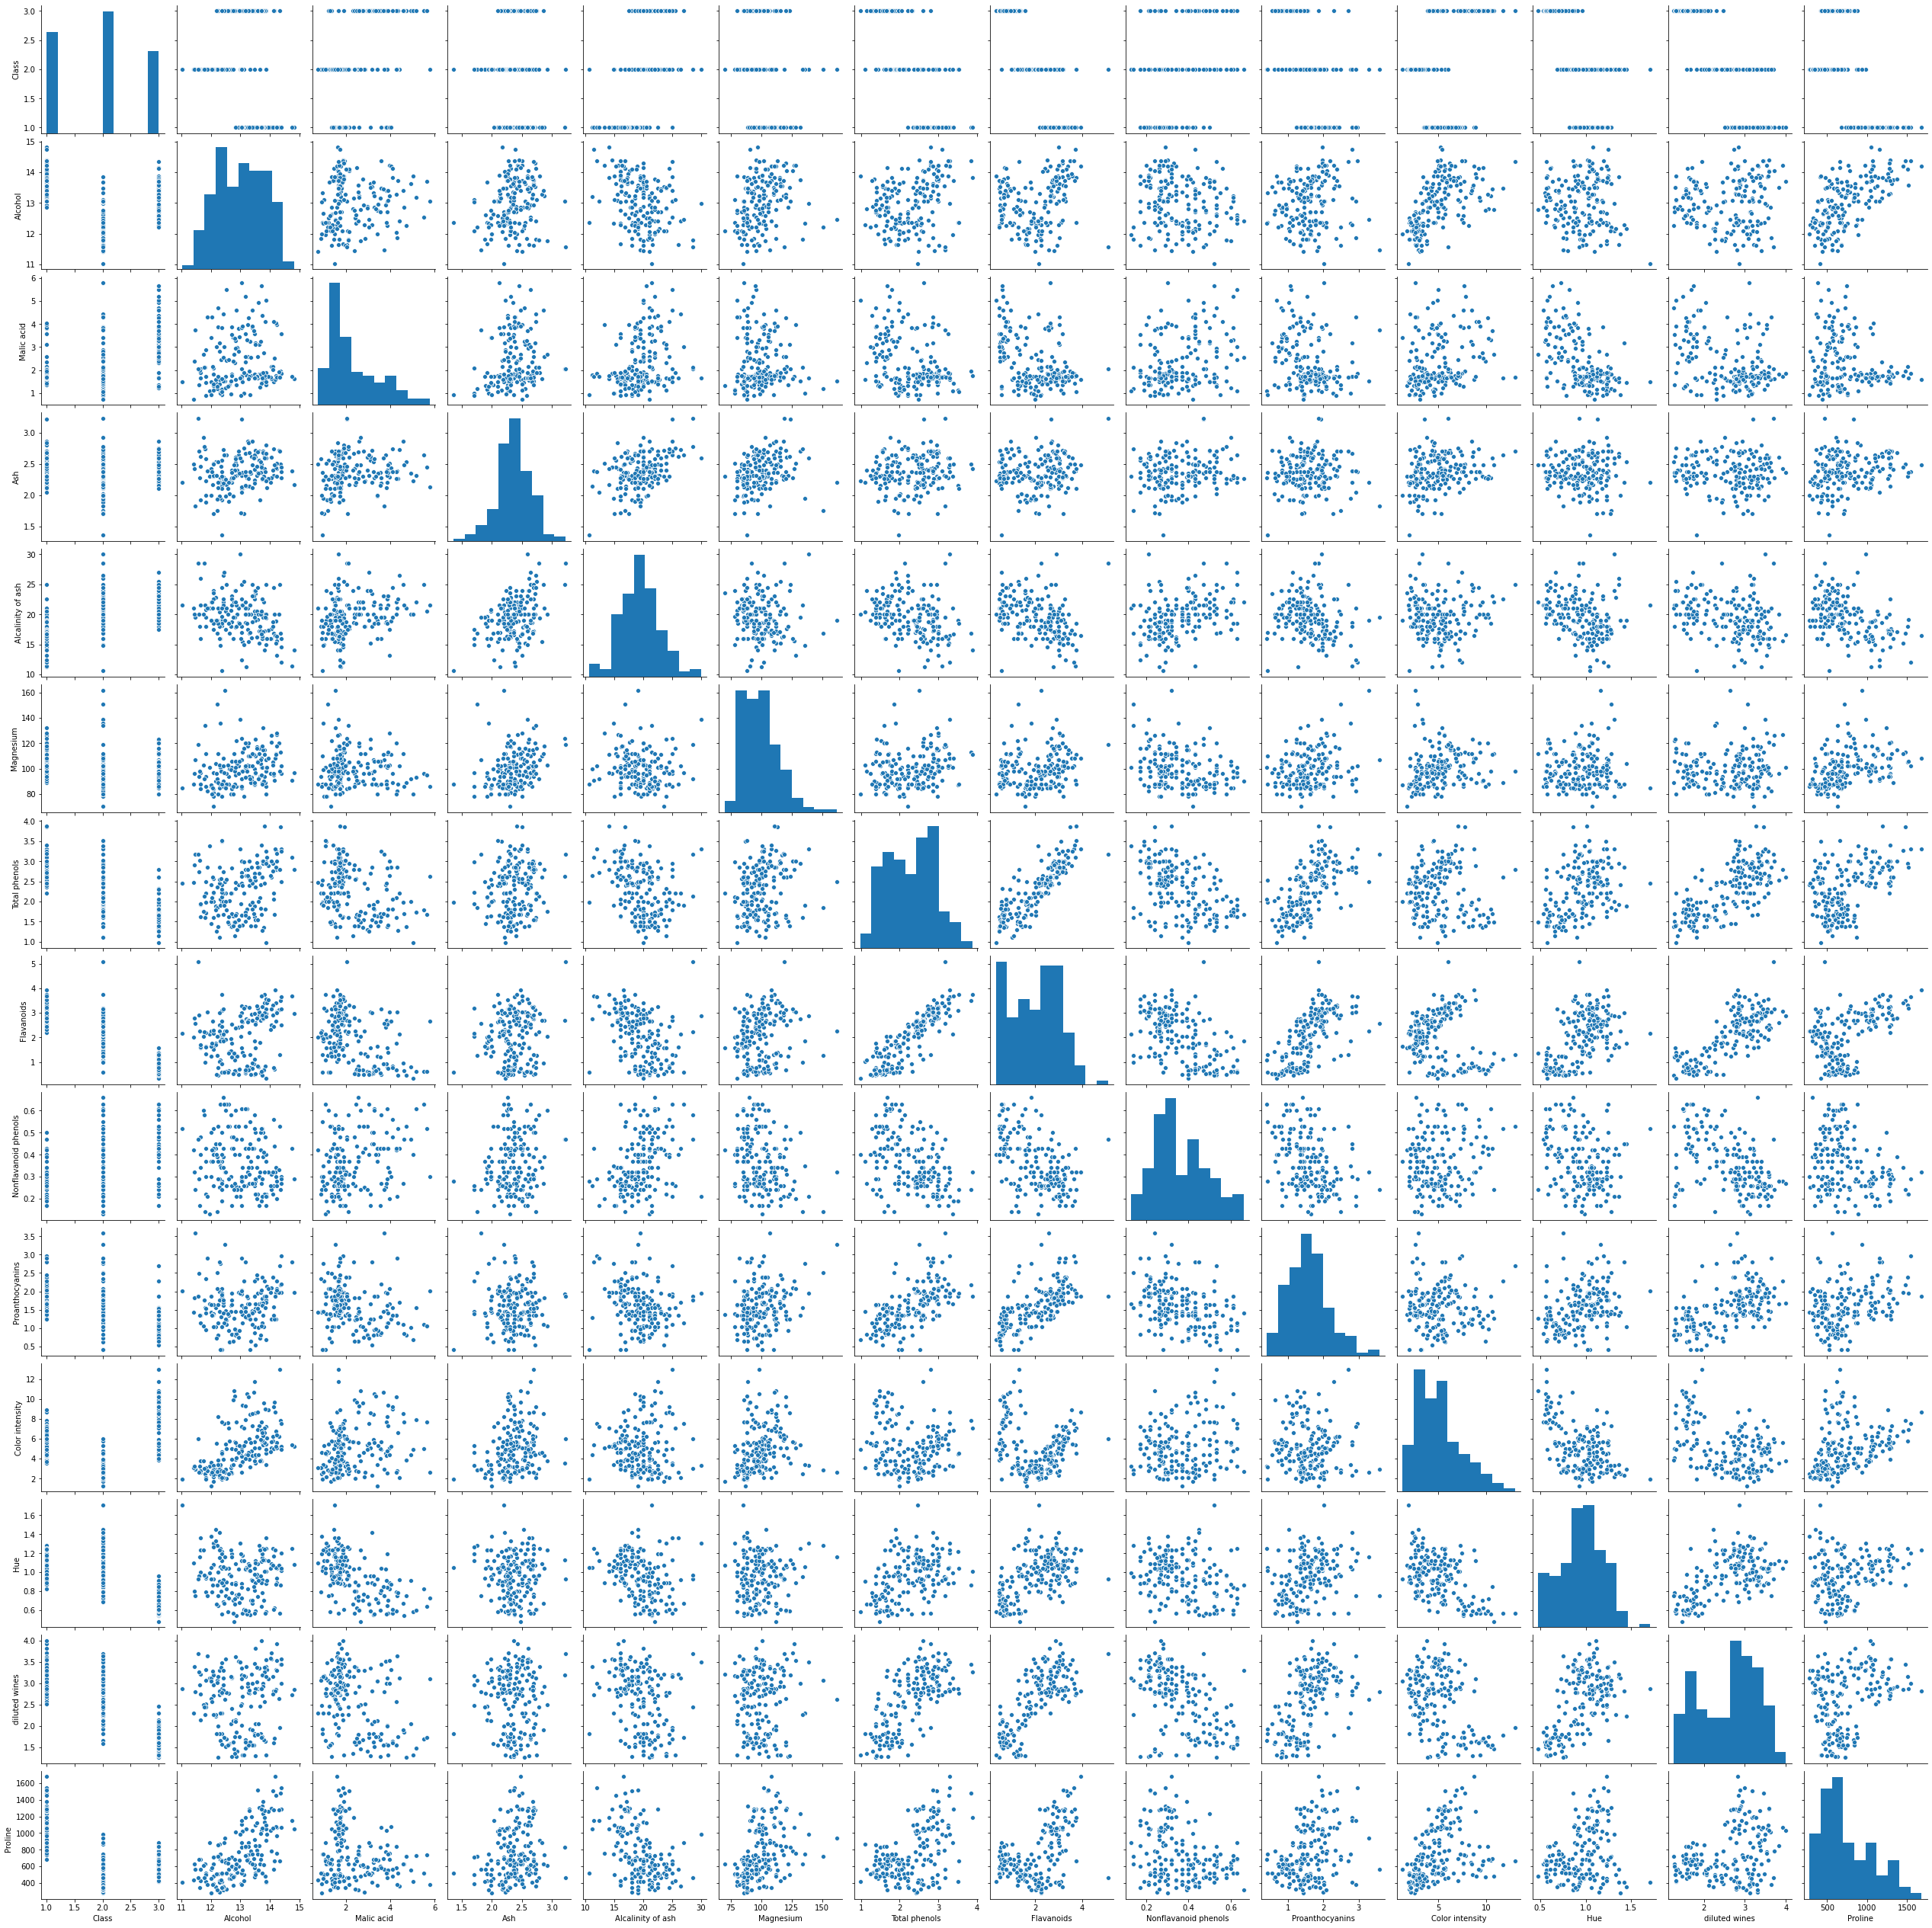

In [26]:
plt.figure(figsize=(10,10))
sn.pairplot(df)

In [25]:
#multivariate analysis
dfcor=df.corr()
dfcor

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


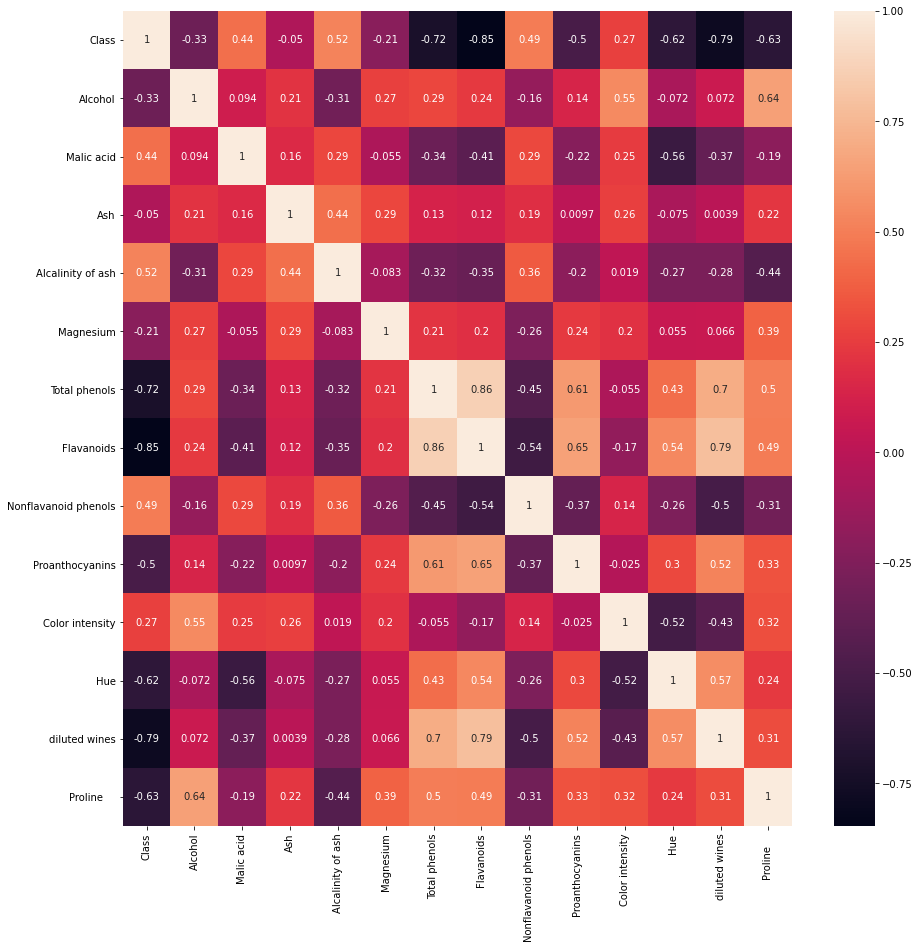

In [27]:
plt.figure(figsize=(15,15))
sn.heatmap(dfcor,annot=True)

OBSERVATIONS :
    
    THE ABOVE CORRELATION TABLE AND GRAPH SHOW US THE NEGATIVE AND POSITIVE CORRELATIONS AS FOLLOWS,
    
    MALIC ACID,ALCALINITY OF ASH,NON-FLAVANOID PHENOLS,COLOR INTENSITY ARE SHOWING POSITIVE CORRELATION WHERE AS 
    ALCOHOL,ASH,MAGNESIUM,TOTAL PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,DILUTED WINES PROLINE ARE SHOWING NEGATIVE
    CORRELATION.

In [29]:
#CHECKING FOR SKEWNESS
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

AS WE KNOW SKEWNESS RANGE OF (+/- 0.5) FROM THE ABOVE LIST OF THE COLUMNS WILL COME UNDER HIGH SKEWNESS.
CONSIDERING THE LIST WE CAN SEE THAT MALIC ACID,MAGNESIUM,COLOR INTENSITY FALLS UNDER THIS CATEGORY.
BUT ON THE OTHER HAND MALIC ACID AND COLOR INTESITY HAVE GOOD CORRELATION WITH THE TARGET.


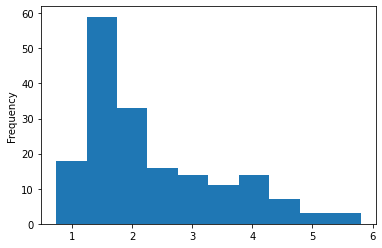

In [30]:
df["Malic acid"].plot.hist()

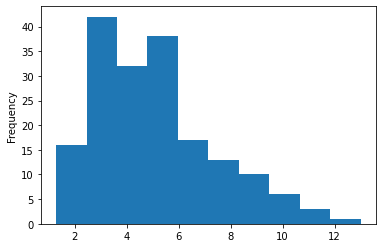

In [31]:
df["Color intensity"].plot.hist()

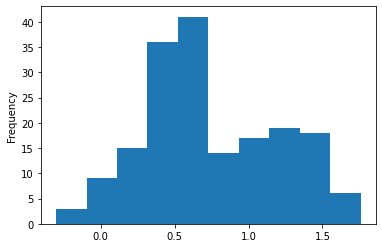

In [32]:
#Removing skewness using boxcox
from scipy.stats import boxcox
df["Malic acid"]=boxcox(df["Malic acid"],0)
df["Malic acid"].plot.hist()

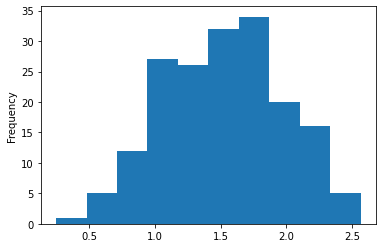

In [33]:
from scipy.stats import boxcox
df["Color intensity"]=boxcox(df["Color intensity"],0)
df["Color intensity"].plot.hist()

In [34]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.274613
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity        -0.080464
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

# ANALYSING AND REMOVING THE OUTLIERS

Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

<Figure size 7200x7200 with 0 Axes>

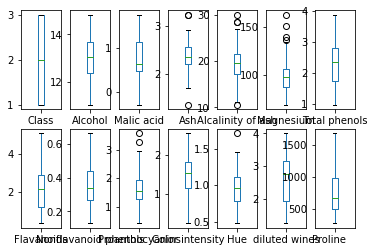

In [43]:
plt.figure(figsize=(100,100))
df.plot(kind="box",subplots=True,layout=(2,7))

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.21394365, 1.51861254, 0.46448718, ..., 0.36217728, 1.84791957,
        1.01300893],
       [1.21394365, 0.24628963, 0.3751346 , ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [1.21394365, 0.19687903, 0.25302455, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [1.37386437, 0.33275817, 1.57881801, ..., 1.61212515, 1.48544548,
        0.28057537],
       [1.37386437, 0.20923168, 0.46013964, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.37386437, 1.39508604, 1.48312691, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [45]:
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7], dtype=int64))


In [46]:
z[25][5]

1.7032651956864722

In [47]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.536493,2.43,15.6,127,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,1065
1,1,13.20,0.576613,2.14,11.2,100,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,1050
2,1,13.16,0.858662,2.67,18.6,101,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,1185
3,1,14.37,0.667829,2.50,16.8,113,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,1480
4,1,13.24,0.951658,2.87,21.0,118,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.731656,2.45,20.5,95,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,740
174,3,13.40,1.363537,2.48,23.0,102,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,750
175,3,13.27,1.453953,2.26,20.0,120,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,835
176,3,13.17,0.951658,2.37,20.0,120,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,840


In [53]:
#dropping unrelated attributes
df_new.drop(["Alcohol","Ash","Hue","Proanthocyanins","Magnesium","Proline    "],axis=1,inplace=True)
df_new

,Class,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,diluted wines
0,1,0.536493,15.6,2.80,3.06,0.28,1.729884,3.92
1,1,0.576613,11.2,2.65,2.76,0.26,1.477049,3.40
2,1,0.858662,18.6,2.80,3.24,0.30,1.736951,3.17
3,1,0.667829,16.8,3.85,3.49,0.24,2.054124,3.45
4,1,0.951658,21.0,2.80,2.69,0.39,1.463255,2.93
...,...,...,...,...,...,...,...,...
173,3,1.731656,20.5,1.68,0.61,0.52,2.041220,1.74
174,3,1.363537,23.0,1.80,0.75,0.43,1.987874,1.56
175,3,1.453953,20.0,1.59,0.69,0.43,2.322388,1.56
176,3,0.951658,20.0,1.65,0.68,0.53,2.230014,1.62


# DATA-SET MODEL TRAINING 

In [60]:
#CLASSIFYING INDEPENDENT AND DEPENDENT VAR
x=df_new.drop("Class",axis=1)
y=df_new["Class"]

In [62]:
#testing and training of data-set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [63]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=85.71556384019546,cross_value_score=79.92980494801729,and difference=5.7857588921781655


In [64]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=96.00372641509433,cross_value_score=79.92980494801729,and difference=16.073921467077042


In [65]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=85.71556384019546,cross_value_score=79.92980494801729,and difference=5.7857588921781655


COMPARING ALL THE TRAINING AND TESTING MODELS RANDOM FOREST REGRESSOR METHOD SEEMS TO HAVE HIGHEST ACCURACY OF 96%

# HYPERPARAMETER TUNING

In [66]:
#creating parameter list to pass in gridsearch CV
parameters={"criterion":["mae"],"n_estimators":[200]}

In [67]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("final accuracy = ",r2_score(y_test,GCV_pred)*100)

final accuracy =  95.28316037735848


SAMPLE ANALYSIS

In [101]:
td=np.array([23.75886,27.0,22.0,33.24,35.80,24.0220,0.84])
td.shape

(7,)

In [102]:
td=td.reshape(1,-1)
td

array([[23.75886, 27.     , 22.     , 33.24   , 35.8    , 24.022  ,
         0.84   ]])

In [103]:
rf.predict(td)

array([1.71])

In [104]:
import joblib
joblib.dump(GCV.best_estimator_,"wine_classification.pkl")

['wine_classification.pkl']